## Breadth-first search

Breadth-first search (BFS) is an algorithm for traversing a graph. It starts at some arbitrary vertex, explores its neighbourhood, and then moves to the next-level neighbours. (https://en.wikipedia.org/wiki/Breadth-first_search)

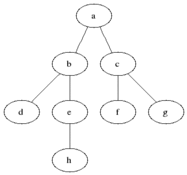

The pseudocode for the version of BFS we have implemented is given below:
```
BFS(Graph, StartVertex, EndVertex):
    initialize an empty set Visited
    initialize a FIFO queue Q
    enqueue StartVertex in Q
    while Q is not empty:
        dequeue from Q into CurrentVertex
        if CurrentVertex is the same as EndVertex:
            return Visited
        for each vertex Neighbor that is adjacent to CurrentVertex:
            if Neighbor is not in Visited:
                add Neighbor to Visited
                enqueue Neighbor in Q
```

In [1]:
class Vertex(object):
    '''A vertex with a parent.'''

    def __init__(self, id_, parent):
        self.id = id_
        self.parent = parent  # Hold parent so we can reconstruct path

def neighbors(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    neighbors = []
    for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]
    return neighbors

def bfs(G, start_id, end_id):
    '''Breadth-first search to reconstruct path between two given start and end vertices
       in an undirected graph G.'''
    visited = []
    Q = [Vertex(start_id, None)]
    while len(Q) > 0:
        # Remove first vertex from Q
        vertex = Q[0]
        del Q[0]
        if vertex.id == end_id:
            return visited  # Found it!
        if vertex not in visited:
            visited.append(vertex)
            for neighbor in neighbors(G, vertex):
                if neighbor not in visited:
                    Q.append(neighbor)

We'll now define the graph `G` on which the function `bfs` will operate.
Note that we're storing edges as pairs `(i, j)` of vertices; you shouldn't change this design decision.

In [2]:
G = ((0, 1), (0, 249), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 60), (5, 4), (5, 6), (6, 5), (6, 7), (7, 8), (7, 233), (7, 6), (8, 9), (8, 7), (9, 8), (9, 10), (9, 125), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 16), (15, 14), (16, 17), (16, 15), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 24), (23, 22), (24, 25), (24, 23), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28), (29, 30), (30, 135), (30, 29), (30, 31), (31, 32), (31, 30), (32, 167), (32, 31), (33, 34), (34, 33), (34, 147), (35, 36), (36, 35), (36, 37), (37, 36), (37, 38), (38, 37), (38, 39), (39, 40), (39, 38), (40, 41), (40, 39), (41, 40), (41, 42), (42, 41), (42, 43), (43, 42), (43, 44), (44, 43), (44, 45), (45, 44), (45, 46), (46, 45), (46, 47), (47, 48), (47, 46), (48, 49), (48, 47), (49, 48), (49, 50), (49, 155), (50, 49), (50, 51), (51, 50), (51, 52), (52, 51), (52, 53), (53, 52), (53, 54), (54, 53), (54, 55), (55, 65), (55, 54), (56, 57), (57, 56), (57, 58), (58, 57), (58, 59), (59, 58), (59, 79), (60, 5), (61, 62), (62, 61), (62, 63), (63, 64), (63, 62), (64, 65), (64, 63), (65, 64), (65, 66), (65, 55), (66, 65), (66, 67), (67, 66), (67, 68), (68, 67), (68, 69), (69, 68), (69, 70), (70, 69), (70, 71), (71, 72), (71, 70), (72, 73), (72, 71), (73, 72), (73, 74), (74, 73), (74, 75), (75, 74), (75, 76), (76, 75), (76, 77), (77, 76), (77, 78), (78, 77), (78, 79), (79, 80), (79, 59), (79, 78), (80, 81), (80, 79), (81, 80), (81, 82), (82, 81), (82, 83), (83, 160), (83, 82), (83, 84), (84, 83), (84, 85), (85, 84), (85, 86), (86, 85), (86, 87), (87, 121), (87, 86), (88, 89), (89, 88), (89, 90), (89, 229), (90, 89), (90, 212), (91, 92), (92, 91), (92, 93), (93, 92), (93, 94), (94, 93), (94, 95), (95, 96), (95, 94), (96, 97), (96, 95), (97, 96), (97, 98), (98, 97), (98, 99), (99, 98), (99, 100), (100, 99), (100, 101), (101, 100), (101, 102), (102, 101), (102, 103), (103, 104), (103, 102), (104, 105), (104, 103), (105, 104), (105, 106), (106, 105), (106, 107), (107, 106), (107, 108), (108, 107), (108, 109), (109, 108), (109, 110), (110, 109), (110, 111), (111, 112), (111, 110), (112, 113), (112, 111), (113, 112), (113, 217), (114, 115), (115, 114), (115, 116), (116, 115), (116, 117), (117, 116), (117, 118), (118, 117), (118, 119), (119, 120), (119, 118), (120, 121), (120, 119), (121, 120), (121, 122), (121, 87), (122, 121), (122, 123), (123, 122), (123, 124), (124, 123), (124, 125), (125, 9), (125, 124), (126, 235), (126, 127), (127, 128), (127, 126), (128, 129), (128, 127), (129, 128), (129, 130), (130, 129), (130, 131), (130, 182), (131, 130), (131, 132), (132, 131), (132, 133), (133, 132), (133, 134), (134, 133), (134, 135), (135, 30), (135, 134), (136, 137), (137, 136), (137, 138), (138, 137), (138, 139), (139, 138), (139, 140), (140, 139), (140, 141), (141, 140), (141, 142), (142, 141), (142, 143), (143, 144), (143, 142), (144, 145), (144, 143), (145, 144), (145, 146), (146, 145), (146, 147), (147, 146), (147, 148), (147, 34), (148, 147), (148, 149), (149, 148), (149, 150), (150, 169), (150, 149), (150, 151), (151, 152), (151, 150), (152, 153), (152, 151), (153, 152), (153, 176), (153, 154), (154, 153), (154, 155), (155, 224), (155, 49), (155, 154), (155, 175), (156, 157), (157, 194), (157, 156), (157, 158), (158, 157), (158, 159), (159, 160), (159, 237), (159, 158), (160, 83), (160, 159), (161, 162), (162, 161), (162, 163), (163, 162), (163, 164), (164, 163), (164, 165), (165, 164), (165, 166), (166, 165), (166, 167), (167, 168), (167, 32), (167, 166), (168, 169), (168, 167), (169, 168), (169, 150), (170, 171), (171, 170), (171, 172), (172, 171), (172, 173), (173, 172), (173, 174), (174, 173), (174, 175), (175, 155), (175, 174), (176, 153), (177, 178), (178, 177), (178, 179), (179, 178), (179, 180), (180, 179), (180, 181), (181, 180), (181, 182), (182, 130), (182, 181), (183, 184), (184, 185), (184, 183), (185, 184), (185, 186), (186, 185), (186, 187), (187, 186), (187, 188), (188, 187), (188, 189), (189, 188), (189, 190), (190, 189), (190, 191), (191, 192), (191, 190), (192, 193), (192, 191), (193, 192), (193, 194), (194, 193), (194, 157), (195, 196), (196, 195), (196, 197), (197, 196), (197, 198), (198, 197), (198, 199), (199, 200), (199, 198), (200, 201), (200, 199), (201, 200), (201, 202), (202, 201), (202, 203), (203, 202), (203, 204), (204, 225), (204, 203), (205, 206), (206, 205), (206, 207), (207, 208), (207, 206), (208, 217), (208, 207), (209, 210), (210, 209), (210, 211), (211, 210), (211, 212), (212, 90), (212, 211), (212, 213), (213, 212), (213, 214), (214, 213), (214, 215), (215, 216), (215, 214), (216, 217), (216, 215), (217, 216), (217, 113), (217, 218), (217, 208), (218, 217), (218, 219), (219, 218), (219, 220), (220, 219), (220, 221), (221, 220), (221, 222), (222, 221), (222, 223), (223, 224), (223, 222), (224, 155), (224, 223), (225, 226), (225, 204), (226, 225), (226, 227), (227, 226), (227, 228), (228, 227), (228, 229), (229, 89), (229, 228), (230, 231), (231, 232), (231, 230), (232, 233), (232, 231), (233, 232), (233, 7), (234, 235), (235, 234), (235, 126), (236, 237), (237, 236), (237, 159), (238, 239), (239, 240), (239, 238), (240, 241), (240, 239), (241, 240), (241, 242), (242, 241), (242, 243), (243, 242), (243, 244), (244, 243), (244, 245), (245, 244), (245, 246), (246, 245), (246, 247), (247, 248), (247, 246), (248, 249), (248, 247), (249, 248), (249, 0))

The algorithm seems to work fine when the distance between the start and end vertices is relatively small, for example between vertices **0**→1→2→**3**.

In [4]:
%%timeit -n1 -r1
visited = bfs(G, 0, 3)

1 loop, best of 1: 3.54 ms per loop


However, the algorithm is very slow when the number of vertices on the BFS path increases, for example between vertices **0**→_..._→**7**.

In [8]:
%%timeit -n1 -r1
visited = bfs(G, 0, 7)

1 loop, best of 1: 3.07 s per loop


The implementation above is an inefficient implementation of the pseudocode BFS supplied above in a number of different aspects. The aim of this task is to modify this initial implementation in order to improve it's run-time execution speed. It's best to give as much commentary around why you made your various changes as possible. There's no time limit for this task, although it's expected that good candidates shouldn't be spending more than an hour or so on the task before achieving significant speed improvements.

## Optimization trials

#### Basic check by running on my machine.

In [4]:
%%timeit -n1 -r1
visited = bfs(G, 0, 3)

1.52 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Seems my machine could be faster that the test machine. OK. Not sure what machine was it initially run on.

In [7]:
%%timeit -n1 -r1
visited = bfs(G, 0, 7)

2.48 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


OK there is a huge increase from 1.52 ms to 2.48 s !!

hmm looking at the code there seems to be use of few for loops. Could we use the deque or some other colletions? Honestly too early to arrive at lot of conclusions. Would need to understand more and profile the code.


### Profiling the code

Lets do a basic code profile to see the bottleneck

In [8]:
%%prun -s cumulative -q -l 10 -T prun1

class Vertex(object):
    '''A vertex with a parent.'''

    def __init__(self, id_, parent):
        self.id = id_
        self.parent = parent  # Hold parent so we can reconstruct path

def neighbors(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    neighbors = []
    for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]
    return neighbors

def bfs(G, start_id, end_id):
    '''Breadth-first search to reconstruct path between two given start and end vertices
       in an undirected graph G.'''
    visited = []
    Q = [Vertex(start_id, None)]
    while len(Q) > 0:
        # Remove first vertex from Q
        vertex = Q[0]
        del Q[0]
        if vertex.id == end_id:
            return visited  # Found it!
        if vertex not in visited:
            visited.append(vertex)
            for neighbor in neighbors(G, vertex):
                if neighbor not in visited:
                    Q.append(neighbor)
                    
visited = bfs(G, 0, 7)

 
*** Profile printout saved to text file 'prun1'. 


In [9]:
print(open('prun1', 'r').read())

         91219 function calls in 2.443 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.443    2.443 {built-in method builtins.exec}
        1    0.001    0.001    2.442    2.442 <string>:3(<module>)
        1    2.028    2.028    2.441    2.441 <string>:20(bfs)
     8257    0.400    0.000    0.410    0.000 <string>:10(neighbors)
    33221    0.010    0.000    0.010    0.000 <string>:6(__init__)
    41477    0.003    0.000    0.003    0.000 {method 'append' of 'list' objects}
     8258    0.001    0.000    0.001    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}
        1    0.000    0.000    0.000    0.000 <string>:3(Vertex)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


From a birds eye view look at this result, the low hanging fruit seems to be in optimization of the function `neighbors(G, vertex)`. Probably that is whats causing the slowness in the `bfs()` . Lets check a heatmap for more clarity

### heat map

The library i am using can be found at `https://github.com/csurfer/pyheat` . After installation run the following to load the extension to Jupyter notebook

In [14]:
%load_ext heat

now use the `%%heat` magic function to get the heat map

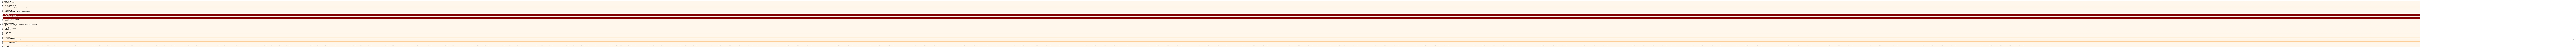

In [19]:
%%heat
class Vertex(object):
    '''A vertex with a parent.'''

    def __init__(self, id_, parent):
        self.id = id_
        self.parent = parent  # Hold parent so we can reconstruct path

def neighbors(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    neighbors = []
    for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]
    return neighbors

def bfs(G, start_id, end_id):
    '''Breadth-first search to reconstruct path between two given start and end vertices
       in an undirected graph G.'''
    visited = []
    Q = [Vertex(start_id, None)]
    while len(Q) > 0:
        # Remove first vertex from Q
        vertex = Q[0]
        del Q[0]
        if vertex.id == end_id:
            return visited  # Found it!
        if vertex not in visited:
            visited.append(vertex)
            for neighbor in neighbors(G, vertex):
                if neighbor not in visited:
                    Q.append(neighbor)
                    
G = ((0, 1), (0, 249), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 60), (5, 4), (5, 6), (6, 5), (6, 7), (7, 8), (7, 233), (7, 6), (8, 9), (8, 7), (9, 8), (9, 10), (9, 125), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 16), (15, 14), (16, 17), (16, 15), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 24), (23, 22), (24, 25), (24, 23), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28), (29, 30), (30, 135), (30, 29), (30, 31), (31, 32), (31, 30), (32, 167), (32, 31), (33, 34), (34, 33), (34, 147), (35, 36), (36, 35), (36, 37), (37, 36), (37, 38), (38, 37), (38, 39), (39, 40), (39, 38), (40, 41), (40, 39), (41, 40), (41, 42), (42, 41), (42, 43), (43, 42), (43, 44), (44, 43), (44, 45), (45, 44), (45, 46), (46, 45), (46, 47), (47, 48), (47, 46), (48, 49), (48, 47), (49, 48), (49, 50), (49, 155), (50, 49), (50, 51), (51, 50), (51, 52), (52, 51), (52, 53), (53, 52), (53, 54), (54, 53), (54, 55), (55, 65), (55, 54), (56, 57), (57, 56), (57, 58), (58, 57), (58, 59), (59, 58), (59, 79), (60, 5), (61, 62), (62, 61), (62, 63), (63, 64), (63, 62), (64, 65), (64, 63), (65, 64), (65, 66), (65, 55), (66, 65), (66, 67), (67, 66), (67, 68), (68, 67), (68, 69), (69, 68), (69, 70), (70, 69), (70, 71), (71, 72), (71, 70), (72, 73), (72, 71), (73, 72), (73, 74), (74, 73), (74, 75), (75, 74), (75, 76), (76, 75), (76, 77), (77, 76), (77, 78), (78, 77), (78, 79), (79, 80), (79, 59), (79, 78), (80, 81), (80, 79), (81, 80), (81, 82), (82, 81), (82, 83), (83, 160), (83, 82), (83, 84), (84, 83), (84, 85), (85, 84), (85, 86), (86, 85), (86, 87), (87, 121), (87, 86), (88, 89), (89, 88), (89, 90), (89, 229), (90, 89), (90, 212), (91, 92), (92, 91), (92, 93), (93, 92), (93, 94), (94, 93), (94, 95), (95, 96), (95, 94), (96, 97), (96, 95), (97, 96), (97, 98), (98, 97), (98, 99), (99, 98), (99, 100), (100, 99), (100, 101), (101, 100), (101, 102), (102, 101), (102, 103), (103, 104), (103, 102), (104, 105), (104, 103), (105, 104), (105, 106), (106, 105), (106, 107), (107, 106), (107, 108), (108, 107), (108, 109), (109, 108), (109, 110), (110, 109), (110, 111), (111, 112), (111, 110), (112, 113), (112, 111), (113, 112), (113, 217), (114, 115), (115, 114), (115, 116), (116, 115), (116, 117), (117, 116), (117, 118), (118, 117), (118, 119), (119, 120), (119, 118), (120, 121), (120, 119), (121, 120), (121, 122), (121, 87), (122, 121), (122, 123), (123, 122), (123, 124), (124, 123), (124, 125), (125, 9), (125, 124), (126, 235), (126, 127), (127, 128), (127, 126), (128, 129), (128, 127), (129, 128), (129, 130), (130, 129), (130, 131), (130, 182), (131, 130), (131, 132), (132, 131), (132, 133), (133, 132), (133, 134), (134, 133), (134, 135), (135, 30), (135, 134), (136, 137), (137, 136), (137, 138), (138, 137), (138, 139), (139, 138), (139, 140), (140, 139), (140, 141), (141, 140), (141, 142), (142, 141), (142, 143), (143, 144), (143, 142), (144, 145), (144, 143), (145, 144), (145, 146), (146, 145), (146, 147), (147, 146), (147, 148), (147, 34), (148, 147), (148, 149), (149, 148), (149, 150), (150, 169), (150, 149), (150, 151), (151, 152), (151, 150), (152, 153), (152, 151), (153, 152), (153, 176), (153, 154), (154, 153), (154, 155), (155, 224), (155, 49), (155, 154), (155, 175), (156, 157), (157, 194), (157, 156), (157, 158), (158, 157), (158, 159), (159, 160), (159, 237), (159, 158), (160, 83), (160, 159), (161, 162), (162, 161), (162, 163), (163, 162), (163, 164), (164, 163), (164, 165), (165, 164), (165, 166), (166, 165), (166, 167), (167, 168), (167, 32), (167, 166), (168, 169), (168, 167), (169, 168), (169, 150), (170, 171), (171, 170), (171, 172), (172, 171), (172, 173), (173, 172), (173, 174), (174, 173), (174, 175), (175, 155), (175, 174), (176, 153), (177, 178), (178, 177), (178, 179), (179, 178), (179, 180), (180, 179), (180, 181), (181, 180), (181, 182), (182, 130), (182, 181), (183, 184), (184, 185), (184, 183), (185, 184), (185, 186), (186, 185), (186, 187), (187, 186), (187, 188), (188, 187), (188, 189), (189, 188), (189, 190), (190, 189), (190, 191), (191, 192), (191, 190), (192, 193), (192, 191), (193, 192), (193, 194), (194, 193), (194, 157), (195, 196), (196, 195), (196, 197), (197, 196), (197, 198), (198, 197), (198, 199), (199, 200), (199, 198), (200, 201), (200, 199), (201, 200), (201, 202), (202, 201), (202, 203), (203, 202), (203, 204), (204, 225), (204, 203), (205, 206), (206, 205), (206, 207), (207, 208), (207, 206), (208, 217), (208, 207), (209, 210), (210, 209), (210, 211), (211, 210), (211, 212), (212, 90), (212, 211), (212, 213), (213, 212), (213, 214), (214, 213), (214, 215), (215, 216), (215, 214), (216, 217), (216, 215), (217, 216), (217, 113), (217, 218), (217, 208), (218, 217), (218, 219), (219, 218), (219, 220), (220, 219), (220, 221), (221, 220), (221, 222), (222, 221), (222, 223), (223, 224), (223, 222), (224, 155), (224, 223), (225, 226), (225, 204), (226, 225), (226, 227), (227, 226), (227, 228), (228, 227), (228, 229), (229, 89), (229, 228), (230, 231), (231, 232), (231, 230), (232, 233), (232, 231), (233, 232), (233, 7), (234, 235), (235, 234), (235, 126), (236, 237), (237, 236), (237, 159), (238, 239), (239, 240), (239, 238), (240, 241), (240, 239), (241, 240), (241, 242), (242, 241), (242, 243), (243, 242), (243, 244), (244, 243), (244, 245), (245, 244), (245, 246), (246, 245), (246, 247), (247, 248), (247, 246), (248, 249), (248, 247), (249, 248), (249, 0))
visited = bfs(G, 0, 7)

So there is a bottle neck for the iterative search inside the tuple (lines 12 to 14) of the `neighbors()` function. We could also see some heat in accessing `visited` (lines 29,32)

### Rewriting the `neighbors()` function

Using tuples for iterative search is not a great idea. Lets convert the intermediate `G` in the  `neighbors()` function to a [`defaultdict`](https://docs.python.org/2/library/collections.html#collections.defaultdict) , which is a highly optimized collections library in python. We would have to rewrite the function a little bit. it will yield the same result. The new function is called `get_neighbors_faster()`. Now lets profile again

In [26]:
%%prun -s cumulative -q -l 10 -T prun2

from collections import defaultdict
d = {}
class Vertex(object):
    '''A vertex with a parent.'''

    def __init__(self, id_, parent):
        self.id = id_
        self.parent = parent  # Hold parent so we can reconstruct path

def neighbors(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    neighbors = []
    for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]
    return neighbors

def get_neighbors_faster(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    # convert the tuple based structure to a default dict 
    #Resulting in Example: d[0] = [1, 249]
    d = {}
    search_vertex = vertex.id
    for k, v in G:
        d.setdefault(k, []).append(v)
    # Create the neighbours array to be returned with the Class type as of the orginal function
    neighbors = [Vertex(item, vertex) for item in d[search_vertex]]
    return neighbors

def bfs(G, start_id, end_id):
    '''Breadth-first search to reconstruct path between two given start and end vertices
       in an undirected graph G.'''
    visited = set()
    Q = [Vertex(start_id, None)]
    while len(Q) > 0:
        # Remove first vertex from Q
        vertex = Q[0]
        del Q[0]
        if vertex.id == end_id:
            return visited  # Found it!
        if vertex not in visited:
            visited.add(vertex)
            for neighbor in get_neighbors_faster(G, vertex):
                if neighbor not in visited:
                    Q.append(neighbor)

G = ((0, 1), (0, 249), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 60), (5, 4), (5, 6), (6, 5), (6, 7), (7, 8), (7, 233), (7, 6), (8, 9), (8, 7), (9, 8), (9, 10), (9, 125), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 16), (15, 14), (16, 17), (16, 15), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 24), (23, 22), (24, 25), (24, 23), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28), (29, 30), (30, 135), (30, 29), (30, 31), (31, 32), (31, 30), (32, 167), (32, 31), (33, 34), (34, 33), (34, 147), (35, 36), (36, 35), (36, 37), (37, 36), (37, 38), (38, 37), (38, 39), (39, 40), (39, 38), (40, 41), (40, 39), (41, 40), (41, 42), (42, 41), (42, 43), (43, 42), (43, 44), (44, 43), (44, 45), (45, 44), (45, 46), (46, 45), (46, 47), (47, 48), (47, 46), (48, 49), (48, 47), (49, 48), (49, 50), (49, 155), (50, 49), (50, 51), (51, 50), (51, 52), (52, 51), (52, 53), (53, 52), (53, 54), (54, 53), (54, 55), (55, 65), (55, 54), (56, 57), (57, 56), (57, 58), (58, 57), (58, 59), (59, 58), (59, 79), (60, 5), (61, 62), (62, 61), (62, 63), (63, 64), (63, 62), (64, 65), (64, 63), (65, 64), (65, 66), (65, 55), (66, 65), (66, 67), (67, 66), (67, 68), (68, 67), (68, 69), (69, 68), (69, 70), (70, 69), (70, 71), (71, 72), (71, 70), (72, 73), (72, 71), (73, 72), (73, 74), (74, 73), (74, 75), (75, 74), (75, 76), (76, 75), (76, 77), (77, 76), (77, 78), (78, 77), (78, 79), (79, 80), (79, 59), (79, 78), (80, 81), (80, 79), (81, 80), (81, 82), (82, 81), (82, 83), (83, 160), (83, 82), (83, 84), (84, 83), (84, 85), (85, 84), (85, 86), (86, 85), (86, 87), (87, 121), (87, 86), (88, 89), (89, 88), (89, 90), (89, 229), (90, 89), (90, 212), (91, 92), (92, 91), (92, 93), (93, 92), (93, 94), (94, 93), (94, 95), (95, 96), (95, 94), (96, 97), (96, 95), (97, 96), (97, 98), (98, 97), (98, 99), (99, 98), (99, 100), (100, 99), (100, 101), (101, 100), (101, 102), (102, 101), (102, 103), (103, 104), (103, 102), (104, 105), (104, 103), (105, 104), (105, 106), (106, 105), (106, 107), (107, 106), (107, 108), (108, 107), (108, 109), (109, 108), (109, 110), (110, 109), (110, 111), (111, 112), (111, 110), (112, 113), (112, 111), (113, 112), (113, 217), (114, 115), (115, 114), (115, 116), (116, 115), (116, 117), (117, 116), (117, 118), (118, 117), (118, 119), (119, 120), (119, 118), (120, 121), (120, 119), (121, 120), (121, 122), (121, 87), (122, 121), (122, 123), (123, 122), (123, 124), (124, 123), (124, 125), (125, 9), (125, 124), (126, 235), (126, 127), (127, 128), (127, 126), (128, 129), (128, 127), (129, 128), (129, 130), (130, 129), (130, 131), (130, 182), (131, 130), (131, 132), (132, 131), (132, 133), (133, 132), (133, 134), (134, 133), (134, 135), (135, 30), (135, 134), (136, 137), (137, 136), (137, 138), (138, 137), (138, 139), (139, 138), (139, 140), (140, 139), (140, 141), (141, 140), (141, 142), (142, 141), (142, 143), (143, 144), (143, 142), (144, 145), (144, 143), (145, 144), (145, 146), (146, 145), (146, 147), (147, 146), (147, 148), (147, 34), (148, 147), (148, 149), (149, 148), (149, 150), (150, 169), (150, 149), (150, 151), (151, 152), (151, 150), (152, 153), (152, 151), (153, 152), (153, 176), (153, 154), (154, 153), (154, 155), (155, 224), (155, 49), (155, 154), (155, 175), (156, 157), (157, 194), (157, 156), (157, 158), (158, 157), (158, 159), (159, 160), (159, 237), (159, 158), (160, 83), (160, 159), (161, 162), (162, 161), (162, 163), (163, 162), (163, 164), (164, 163), (164, 165), (165, 164), (165, 166), (166, 165), (166, 167), (167, 168), (167, 32), (167, 166), (168, 169), (168, 167), (169, 168), (169, 150), (170, 171), (171, 170), (171, 172), (172, 171), (172, 173), (173, 172), (173, 174), (174, 173), (174, 175), (175, 155), (175, 174), (176, 153), (177, 178), (178, 177), (178, 179), (179, 178), (179, 180), (180, 179), (180, 181), (181, 180), (181, 182), (182, 130), (182, 181), (183, 184), (184, 185), (184, 183), (185, 184), (185, 186), (186, 185), (186, 187), (187, 186), (187, 188), (188, 187), (188, 189), (189, 188), (189, 190), (190, 189), (190, 191), (191, 192), (191, 190), (192, 193), (192, 191), (193, 192), (193, 194), (194, 193), (194, 157), (195, 196), (196, 195), (196, 197), (197, 196), (197, 198), (198, 197), (198, 199), (199, 200), (199, 198), (200, 201), (200, 199), (201, 200), (201, 202), (202, 201), (202, 203), (203, 202), (203, 204), (204, 225), (204, 203), (205, 206), (206, 205), (206, 207), (207, 208), (207, 206), (208, 217), (208, 207), (209, 210), (210, 209), (210, 211), (211, 210), (211, 212), (212, 90), (212, 211), (212, 213), (213, 212), (213, 214), (214, 213), (214, 215), (215, 216), (215, 214), (216, 217), (216, 215), (217, 216), (217, 113), (217, 218), (217, 208), (218, 217), (218, 219), (219, 218), (219, 220), (220, 219), (220, 221), (221, 220), (221, 222), (222, 221), (222, 223), (223, 224), (223, 222), (224, 155), (224, 223), (225, 226), (225, 204), (226, 225), (226, 227), (227, 226), (227, 228), (228, 227), (228, 229), (229, 89), (229, 228), (230, 231), (231, 232), (231, 230), (232, 233), (232, 231), (233, 232), (233, 7), (234, 235), (235, 234), (235, 126), (236, 237), (237, 236), (237, 159), (238, 239), (239, 240), (239, 238), (240, 241), (240, 239), (241, 240), (241, 242), (242, 241), (242, 243), (243, 242), (243, 244), (244, 243), (244, 245), (245, 244), (245, 246), (246, 245), (246, 247), (247, 248), (247, 246), (248, 249), (248, 247), (249, 248), (249, 0))
visited = bfs(G, 0, 7)

 
*** Profile printout saved to text file 'prun2'. 


In [27]:
print(open('prun2', 'r').read())

         193562 function calls in 0.044 seconds

   Ordered by: cumulative time
   List reduced from 16 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.044    0.044 {built-in method builtins.exec}
        1    0.000    0.000    0.042    0.042 <string>:3(<module>)
        1    0.001    0.001    0.042    0.042 <string>:34(bfs)
      192    0.025    0.000    0.040    0.000 <string>:22(get_neighbors_faster)
    96000    0.009    0.000    0.009    0.000 {method 'setdefault' of 'dict' objects}
    96391    0.006    0.000    0.006    0.000 {method 'append' of 'list' objects}
      192    0.000    0.000    0.001    0.000 <string>:31(<listcomp>)
      392    0.000    0.000    0.000    0.000 <string>:8(__init__)
      192    0.000    0.000    0.000    0.000 {method 'add' of 'set' objects}
      193    0.000    0.000    0.000    0.000 {built-in method builtins.len}


OK we are seeing some good improvement `From 2.443s to 0.044s` .Lets just time it as well

In [32]:
%%timeit
visited = bfs(G, 0, 7)

14.7 ms ± 65.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


I did try using `set()` and [`deque()`](https://docs.python.org/2/library/collections.html#collections.deque) instead of the list but it didn't show resonalbe imprmovements.I think the it should start to show some improvements once the input increases !!! The `deque()` example is shown below

In [36]:
%%prun -s cumulative -q -l 10 -T prun3

from collections import defaultdict
from collections import deque

class Vertex(object):
    '''A vertex with a parent.'''

    def __init__(self, id_, parent):
        self.id = id_
        self.parent = parent  # Hold parent so we can reconstruct path

def neighbors(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    neighbors = []
    for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]
    return neighbors

def get_neighbors_faster(G, vertex):
    '''Return the neighbors of a given vertex in an undirected graph G.'''
    # convert the tuple based structure to a default dict 
    #Resulting in Example: d[0] = [1, 249]
    d = {}
    search_vertex = vertex.id
    for k, v in G:
        d.setdefault(k, []).append(v)
    # Create the neighbours array to be returned with the Class type as of the orginal function
    
    neighbors = [Vertex(item, vertex) for item in d[search_vertex]]
    
    """for i, j in G:
        if i == vertex.id:    # i → j
            neighbors += [Vertex(j, vertex)]
        elif j == vertex.id:  # j → i
            neighbors += [Vertex(i, vertex)]"""
    return neighbors

def bfs(G, start_id, end_id):
    '''Breadth-first search to reconstruct path between two given start and end vertices
       in an undirected graph G.'''
    visited =deque()
    Q = [Vertex(start_id, None)]
    while len(Q) > 0:
        # Remove first vertex from Q
        vertex = Q[0]
        del Q[0]
        if vertex.id == end_id:
            return visited  # Found it!
        if vertex not in visited:
            visited.append(vertex)
            for neighbor in get_neighbors_faster(G, vertex):
                if not bool(visited.count(neighbor)): # similar to :- if neighbor not in visited:
                    Q.append(neighbor)

G = ((0, 1), (0, 249), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 60), (5, 4), (5, 6), (6, 5), (6, 7), (7, 8), (7, 233), (7, 6), (8, 9), (8, 7), (9, 8), (9, 10), (9, 125), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 16), (15, 14), (16, 17), (16, 15), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 24), (23, 22), (24, 25), (24, 23), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28), (29, 30), (30, 135), (30, 29), (30, 31), (31, 32), (31, 30), (32, 167), (32, 31), (33, 34), (34, 33), (34, 147), (35, 36), (36, 35), (36, 37), (37, 36), (37, 38), (38, 37), (38, 39), (39, 40), (39, 38), (40, 41), (40, 39), (41, 40), (41, 42), (42, 41), (42, 43), (43, 42), (43, 44), (44, 43), (44, 45), (45, 44), (45, 46), (46, 45), (46, 47), (47, 48), (47, 46), (48, 49), (48, 47), (49, 48), (49, 50), (49, 155), (50, 49), (50, 51), (51, 50), (51, 52), (52, 51), (52, 53), (53, 52), (53, 54), (54, 53), (54, 55), (55, 65), (55, 54), (56, 57), (57, 56), (57, 58), (58, 57), (58, 59), (59, 58), (59, 79), (60, 5), (61, 62), (62, 61), (62, 63), (63, 64), (63, 62), (64, 65), (64, 63), (65, 64), (65, 66), (65, 55), (66, 65), (66, 67), (67, 66), (67, 68), (68, 67), (68, 69), (69, 68), (69, 70), (70, 69), (70, 71), (71, 72), (71, 70), (72, 73), (72, 71), (73, 72), (73, 74), (74, 73), (74, 75), (75, 74), (75, 76), (76, 75), (76, 77), (77, 76), (77, 78), (78, 77), (78, 79), (79, 80), (79, 59), (79, 78), (80, 81), (80, 79), (81, 80), (81, 82), (82, 81), (82, 83), (83, 160), (83, 82), (83, 84), (84, 83), (84, 85), (85, 84), (85, 86), (86, 85), (86, 87), (87, 121), (87, 86), (88, 89), (89, 88), (89, 90), (89, 229), (90, 89), (90, 212), (91, 92), (92, 91), (92, 93), (93, 92), (93, 94), (94, 93), (94, 95), (95, 96), (95, 94), (96, 97), (96, 95), (97, 96), (97, 98), (98, 97), (98, 99), (99, 98), (99, 100), (100, 99), (100, 101), (101, 100), (101, 102), (102, 101), (102, 103), (103, 104), (103, 102), (104, 105), (104, 103), (105, 104), (105, 106), (106, 105), (106, 107), (107, 106), (107, 108), (108, 107), (108, 109), (109, 108), (109, 110), (110, 109), (110, 111), (111, 112), (111, 110), (112, 113), (112, 111), (113, 112), (113, 217), (114, 115), (115, 114), (115, 116), (116, 115), (116, 117), (117, 116), (117, 118), (118, 117), (118, 119), (119, 120), (119, 118), (120, 121), (120, 119), (121, 120), (121, 122), (121, 87), (122, 121), (122, 123), (123, 122), (123, 124), (124, 123), (124, 125), (125, 9), (125, 124), (126, 235), (126, 127), (127, 128), (127, 126), (128, 129), (128, 127), (129, 128), (129, 130), (130, 129), (130, 131), (130, 182), (131, 130), (131, 132), (132, 131), (132, 133), (133, 132), (133, 134), (134, 133), (134, 135), (135, 30), (135, 134), (136, 137), (137, 136), (137, 138), (138, 137), (138, 139), (139, 138), (139, 140), (140, 139), (140, 141), (141, 140), (141, 142), (142, 141), (142, 143), (143, 144), (143, 142), (144, 145), (144, 143), (145, 144), (145, 146), (146, 145), (146, 147), (147, 146), (147, 148), (147, 34), (148, 147), (148, 149), (149, 148), (149, 150), (150, 169), (150, 149), (150, 151), (151, 152), (151, 150), (152, 153), (152, 151), (153, 152), (153, 176), (153, 154), (154, 153), (154, 155), (155, 224), (155, 49), (155, 154), (155, 175), (156, 157), (157, 194), (157, 156), (157, 158), (158, 157), (158, 159), (159, 160), (159, 237), (159, 158), (160, 83), (160, 159), (161, 162), (162, 161), (162, 163), (163, 162), (163, 164), (164, 163), (164, 165), (165, 164), (165, 166), (166, 165), (166, 167), (167, 168), (167, 32), (167, 166), (168, 169), (168, 167), (169, 168), (169, 150), (170, 171), (171, 170), (171, 172), (172, 171), (172, 173), (173, 172), (173, 174), (174, 173), (174, 175), (175, 155), (175, 174), (176, 153), (177, 178), (178, 177), (178, 179), (179, 178), (179, 180), (180, 179), (180, 181), (181, 180), (181, 182), (182, 130), (182, 181), (183, 184), (184, 185), (184, 183), (185, 184), (185, 186), (186, 185), (186, 187), (187, 186), (187, 188), (188, 187), (188, 189), (189, 188), (189, 190), (190, 189), (190, 191), (191, 192), (191, 190), (192, 193), (192, 191), (193, 192), (193, 194), (194, 193), (194, 157), (195, 196), (196, 195), (196, 197), (197, 196), (197, 198), (198, 197), (198, 199), (199, 200), (199, 198), (200, 201), (200, 199), (201, 200), (201, 202), (202, 201), (202, 203), (203, 202), (203, 204), (204, 225), (204, 203), (205, 206), (206, 205), (206, 207), (207, 208), (207, 206), (208, 217), (208, 207), (209, 210), (210, 209), (210, 211), (211, 210), (211, 212), (212, 90), (212, 211), (212, 213), (213, 212), (213, 214), (214, 213), (214, 215), (215, 216), (215, 214), (216, 217), (216, 215), (217, 216), (217, 113), (217, 218), (217, 208), (218, 217), (218, 219), (219, 218), (219, 220), (220, 219), (220, 221), (221, 220), (221, 222), (222, 221), (222, 223), (223, 224), (223, 222), (224, 155), (224, 223), (225, 226), (225, 204), (226, 225), (226, 227), (227, 226), (227, 228), (228, 227), (228, 229), (229, 89), (229, 228), (230, 231), (231, 232), (231, 230), (232, 233), (232, 231), (233, 232), (233, 7), (234, 235), (235, 234), (235, 126), (236, 237), (237, 236), (237, 159), (238, 239), (239, 240), (239, 238), (240, 241), (240, 239), (241, 240), (241, 242), (242, 241), (242, 243), (243, 242), (243, 244), (244, 243), (244, 245), (245, 244), (245, 246), (246, 245), (246, 247), (247, 248), (247, 246), (248, 249), (248, 247), (249, 248), (249, 0))
visited = bfs(G, 0, 7)

 
*** Profile printout saved to text file 'prun3'. 


In [37]:
print(open('prun3', 'r').read())

         193957 function calls in 0.042 seconds

   Ordered by: cumulative time
   List reduced from 17 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.002    0.002    0.042    0.042 {built-in method builtins.exec}
        1    0.000    0.000    0.040    0.040 <string>:3(<module>)
        1    0.002    0.002    0.040    0.040 <string>:42(bfs)
      192    0.023    0.000    0.038    0.000 <string>:23(get_neighbors_faster)
    96000    0.009    0.000    0.009    0.000 {method 'setdefault' of 'dict' objects}
    96391    0.006    0.000    0.006    0.000 {method 'append' of 'list' objects}
      391    0.001    0.000    0.001    0.000 {method 'count' of 'collections.deque' objects}
      192    0.000    0.000    0.000    0.000 <string>:33(<listcomp>)
      392    0.000    0.000    0.000    0.000 <string>:9(__init__)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.__build_class__}


## Conclusion
Further optimzations can be done if we could change the desgin design decisions regarding the `vertex (i,j)`, like using a graph library optimized exactly for such purposes